In [26]:
from elasticsearch import Elasticsearch, helpers
import os
from security import mykey as my

In [34]:
es_name = "elastic"
es_pwd = my.getKey(os.path.join("security","key.properties"))

In [35]:
es = Elasticsearch( 
    http_auth=('elastic', es_pwd[es_name])
)

In [41]:
body = {
    "query": {
        "match": {
            "core.title": "2022"
        }
    },
    "_source": ["core.title", "core.dep"]
}

In [42]:
search_result = es.search(index = 'd_search_test_1', body = body)

/var/folders/5v/vp7_v45s7pj122z7d82mm5d40000gn/T/ipykernel_21267/4079412371.py:1: DeprecationWarning: The 'body' parameter is deprecated for the 'search' API and will be removed in a future version. Instead use API parameters directly. See https://github.com/elastic/elasticsearch-py/issues/1698 for more information
  search_result = es.search(index = 'd_search_test_1', body = body)


In [44]:
search_result

{'took': 2,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 3, 'relation': 'eq'},
  'max_score': 2.6960745,
  'hits': [{'_index': 'd_search_test_1',
    '_type': '_doc',
    '_id': 'amL7dnsBJ1aBDOIV2jmY',
    '_score': 2.6960745,
    '_source': {'core': {'title': '2022년도 월력요항 발표', 'dep': '과학기술정보통신부'}}},
   {'_index': 'd_search_test_1',
    '_type': '_doc',
    '_id': 'bmL7dnsBJ1aBDOIV2jmY',
    '_score': 2.1423483,
    '_source': {'core': {'title': '코로나19 대응 2022학년도 대입 관리방향 발표',
      'dep': '교육부'}}},
   {'_index': 'd_search_test_1',
    '_type': '_doc',
    '_id': 'V2L7dnsBJ1aBDOIV2jmY',
    '_score': 1.9797094,
    '_source': {'core': {'title': '2022년 식·의약 안전기술 대국민 현장수요조사 실시',
      'dep': '식품의약품안전처'}}}]}}

In [47]:
nums = search_result["took"]
nums = str(nums) +".jpg"

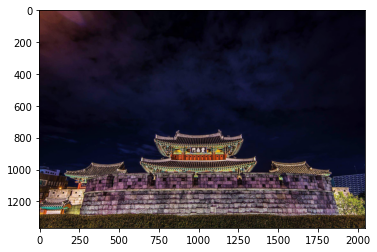

In [48]:
import matplotlib.image as img 
import matplotlib.pyplot as plt 
fileName = os.path.join("images", nums) 
ndarray = img.imread(fileName) 
plt.imshow(ndarray) 
plt.show()